# Image Classification
Author: Zuhayr Ali<br>
December 4, 2022

### Intro
This notebook will exploring using deep learning to classify images from the CIFAR100 dataset. The CIFAR100 is a 60,000 RGB dataset of 32x32 images divided into 20 superclasses based on categories such as plants, animals, humans, buildings, objects, and vehicles; each superclass has 5 subclasses of specific entities belonging to each category, bringing a total of 100 classes. Due to confusion and time constraints the CIFAR100 dataset was loaded from within Keras as one of its sample datasets, selecting to classify by the subclasses. The goal is to accurately classify an image into a subclass - ergo it must predict both the category of subject matter and the specific identity of the subject matter.

### Load dataset

In [1]:
import tensorflow as tf
import numpy as np
import keras

batch_size = 128
num_classes = 100
epochs = 20

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode="fine")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train, X_test = X_train / 255.0, X_test / 255.0

print(X_train[:5])
print('\n')
print("dimensions:", X_train.shape)

print('\n')
print(X_test[:5])
print('\n')
print("dimensions:", X_test.shape)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.76470588 0.80392157 0.75686275]
   [0.83137255 0.87843137 0.8       ]
   [0.71372549 0.76078431 0.65490196]]

  [[1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.66666667 0.69019608 0.58823529]
   [0.63137255 0.65882353 0.50980392]
   [0.57254902 0.60392157 0.44313725]]

  [[1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [1.         1.         1.        ]
   ...
   [0.74117647 0.78039216 0.6627451 ]
   [0.65098039 0.69803922 0.50980392]
   [0.4745098  0.52156863 0.34117647]]

  ...

  [[0.58039216 0.7254902  0.30980392]
   [0.55686275 0.71372549 0.22352941]
   [0.54901961 0.70196078 0.23529412]
   ...
   [0.11764706 0.06666667 0.00392157]
   [0.25490196 0.24313725 0.05882353]
   [0.29803922 0.30196078 0.07843137]]

  [[0.47843137 0.61568627 0.25882353]
   [0.4

### Class distribution

[[<AxesSubplot:title={'center':'label'}>]]


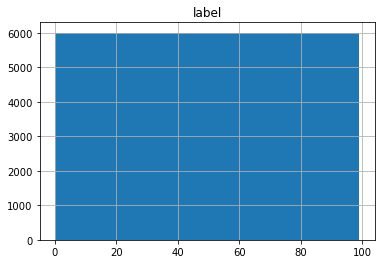

In [2]:
import pandas as pd

df = pd.DataFrame(np.append(np.argmax(y_train, axis=1), np.argmax(y_test, axis=1)), columns=['label'])
hist = df.hist()
print(hist)

### Sequential model
#### Training

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop

seq_model = Sequential([
  Flatten(input_shape=(32,32,3)),
  Dense(512, activation='relu'),
  Dropout(0.2),
  Dense(512, activation='relu'),
  Dropout(0.2),
  Dense(num_classes, activation='softmax'),
])

seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,887,332
Trainable params: 1,887,332
Non-

#### Testing

In [4]:
seq_model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

seq_history = seq_model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/20
391/391 [==============================] - 6s 15ms/step - loss: 0.0673 - accuracy: 0.0417 - val_loss: 0.0560 - val_accuracy: 0.0849
Epoch 2/20
391/391 [==============================] - 6s 14ms/step - loss: 0.0527 - accuracy: 0.0913 - val_loss: 0.0498 - val_accuracy: 0.1141
Epoch 3/20
391/391 [==============================] - 6s 15ms/step - loss: 0.0493 - accuracy: 0.1127 - val_loss: 0.0483 - val_accuracy: 0.1410
Epoch 4/20
391/391 [==============================] - 6s 14ms/step - loss: 0.0483 - accuracy: 0.1282 - val_loss: 0.0474 - val_accuracy: 0.1417
Epoch 5/20
391/391 [==============================] - 6s 14ms/step - loss: 0.0475 - accuracy: 0.1393 - val_loss: 0.0468 - val_accuracy: 0.1548
Epoch 6/20
391/391 [==============================] - 6s 14ms/step - loss: 0.0471 - accuracy: 0.1471 - val_loss: 0.0457 - val_accuracy: 0.1773
Epoch 7/20
391/391 [==============================] - 6s 14ms/step - loss: 0.0467 - accuracy: 0.1549 - val_loss: 0.0453 - val_accuracy: 0.1693

#### Analysis

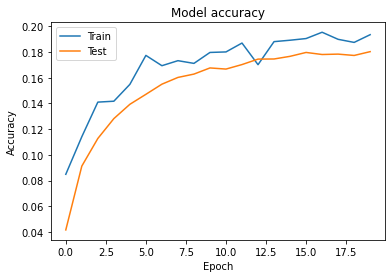

In [5]:
import matplotlib.pyplot as plt

plt.plot(seq_history.history['val_accuracy'])
plt.plot(seq_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [6]:
seq_score = seq_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', seq_score[0])
print('Test accuracy:', seq_score[1])

Test loss: 0.04513979330658913
Test accuracy: 0.19339999556541443


### CNN
#### Training

In [7]:
from keras import Input
from keras.layers import Conv2D, MaxPooling2D

num_filters = 8
filter_size = 3
pool_size = 2

cnn_model = Sequential(
    [
        Input(shape=(32, 32, 3)),
        Conv2D(32, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        Conv2D(64, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2304)             

#### Testing

In [8]:
from keras.optimizers import Adam

cnn_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/20
391/391 [==============================] - 13s 33ms/step - loss: 3.9020 - accuracy: 0.1180 - val_loss: 3.4041 - val_accuracy: 0.2091
Epoch 2/20
391/391 [==============================] - 13s 32ms/step - loss: 3.2979 - accuracy: 0.2241 - val_loss: 3.0982 - val_accuracy: 0.2689
Epoch 3/20
391/391 [==============================] - 13s 33ms/step - loss: 3.0500 - accuracy: 0.2701 - val_loss: 2.9242 - val_accuracy: 0.2996
Epoch 4/20
391/391 [==============================] - 13s 32ms/step - loss: 2.9029 - accuracy: 0.2978 - val_loss: 2.8290 - val_accuracy: 0.3249
Epoch 5/20
391/391 [==============================] - 12s 32ms/step - loss: 2.7724 - accuracy: 0.3219 - val_loss: 2.7461 - val_accuracy: 0.3330
Epoch 6/20
391/391 [==============================] - 13s 32ms/step - loss: 2.6825 - accuracy: 0.3394 - val_loss: 2.6743 - val_accuracy: 0.3489
Epoch 7/20
391/391 [==============================] - 13s 32ms/step - loss: 2.6016 - accuracy: 0.3564 - val_loss: 2.6322 - val_accuracy:

#### Analysis

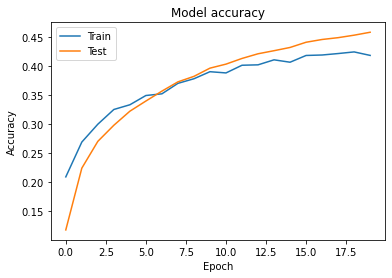

In [9]:
plt.plot(cnn_history.history['val_accuracy'])
plt.plot(cnn_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
cnn_score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', cnn_score[0])
print('Test accuracy:', cnn_score[1])

Test loss: 2.32599139213562
Test accuracy: 0.41780000925064087


### Pre-trained model (VGG16)
#### Training

In [11]:
from keras import Model
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D

X_train, X_test = X_train * 255.0, X_test * 255.0

base_model = VGG16(
    weights='imagenet',
    input_shape=(32, 32, 3),
    include_top=False)

base_model.trainable = False

inputs = Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(100)(x)
pret_model = Model(inputs, outputs)

pret_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 100)               51300     
                                                                 
Total params: 14,765,988
Trainable params: 51,300
Non-trainable params: 14,714,688
_________________________________________________________________


#### Testing

In [12]:
pret_model.compile(loss='categorical_crossentropy',
                    optimizer=Adam(),
                    metrics=['accuracy'])

pret_history = pret_model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/20
391/391 [==============================] - 57s 146ms/step - loss: 8.9790 - accuracy: 0.0255 - val_loss: 8.8312 - val_accuracy: 0.0355
Epoch 2/20
391/391 [==============================] - 55s 141ms/step - loss: 8.7044 - accuracy: 0.0389 - val_loss: 8.6733 - val_accuracy: 0.0379
Epoch 3/20
391/391 [==============================] - 55s 142ms/step - loss: 8.5454 - accuracy: 0.0428 - val_loss: 8.6058 - val_accuracy: 0.0409
Epoch 4/20
391/391 [==============================] - 55s 141ms/step - loss: 8.4708 - accuracy: 0.0444 - val_loss: 8.2620 - val_accuracy: 0.0456
Epoch 5/20
391/391 [==============================] - 56s 144ms/step - loss: 8.4461 - accuracy: 0.0499 - val_loss: 8.4399 - val_accuracy: 0.0507
Epoch 6/20
391/391 [==============================] - 57s 146ms/step - loss: 8.3813 - accuracy: 0.0562 - val_loss: 8.5920 - val_accuracy: 0.0559
Epoch 7/20
391/391 [==============================] - 57s 145ms/step - loss: 8.3800 - accuracy: 0.0604 - val_loss: 8.5528 - val_ac

#### Analysis

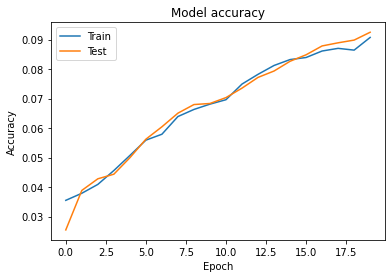

In [13]:
plt.plot(pret_history.history['val_accuracy'])
plt.plot(pret_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
pret_score = pret_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', pret_score[0])
print('Test accuracy:', pret_score[1])

Test loss: 8.523427963256836
Test accuracy: 0.09070000052452087


### Discussion
Although none are particularly accurate, the results between models are all significantly different and so might more strongly highlight the different capabilities of each model than had the models been trained on a dataset that's easier to classify. The sequential model's accuracy was in the middle of the 3 models at 19.34% accuracy. However, despite having the least test loss at less than 0.05, the sequential model had the quickest running epochs at 6 seconds each. The CNN model produced the most accurate predictions at 41.78% accuracy. The test loss and epoch eras were both in the middle of the 3 model at 2.326 and 13 seconds respectively. Although the ratio of accuracy to combined epoch time is the same between the two former models and the CNN model took twice as long, the roughly doubled accuracy of the CNN model makes it much more appealing to me for image classification. I was not able to learn how to preprocess the dataset for the pre-trained VGG16 model, which might explain why the results of using VGG16 were generally the worst. The test loss was the highest at 8.523, but the accuracy was the lowest at 9.07% and the epoch runtime was the longest at between 55 and 58 seconds per epoch. In addition, the former two models reached the maximum accuracy in fewer epochs than the VGG16 model. Perhaps the pre-trained model would have performed far better had I time to properly learn how to implement the model.